# Reinforcement Learning

- Jorge Caballeros Pérez - 20009

- 15/7/2024


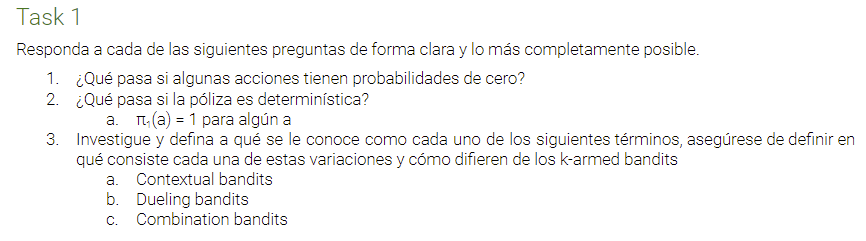

1. Si algunas de las acciones tienen probabilidades de cero, estas nunca seran tomadas en cuenta por el agente, esto significa que el agente podría encontrar un camino diferente al óptimo en la toma de decisiones.  El agente determinará según su poliza que las acciones no son útiles para determinar su recompensa. La explotación se maximiza mientras que la exploración se minimiza, lo cual no es óptimo. 

2. Si una poliza es determinisitica con una probabilidad de "1" entonces el agente siempre tomará esa acción. Sucede totalmente lo contrario que el caso anterior, aquí el agente maximiza la exploración y minimiza la explotación. Esto tampoco es óptimo para el entrenamiento del agente. 

3. 

    - Contextual bandits: Esta variante del problema de k-armed bandits, consiste en que el agente no tiene un contexto fijo a lo largo de su toma de acciones. La recompensa de una acción varía dependiendo el estado en donde se encuentra el agente. 
    - Dueling Bandits: En esta variante, en vez de tener recompensas numéricas , el agente hace una comparación entre dos acciones y toma la acción según el resultado de esta comparación. 
    - Combination Bandits: En esta variante, el agente no solo toma una acción por cada iteración. Trata de averiguar cual es la ruta óptima de acciónes que debe tomar para llegar a un máximo nivel de recompensa. 


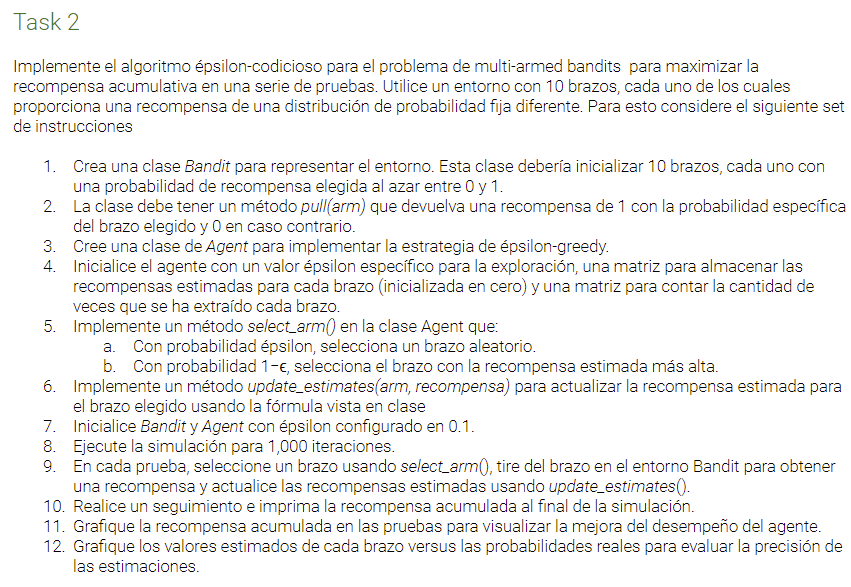


C:\Users\jorge\AppData\Local\Temp\ipykernel_37688\3246018883.py:21: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead
  return int(np.random.random_integers(0,9))


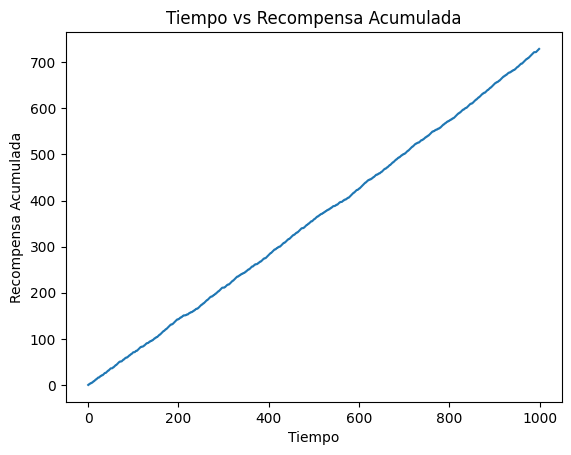

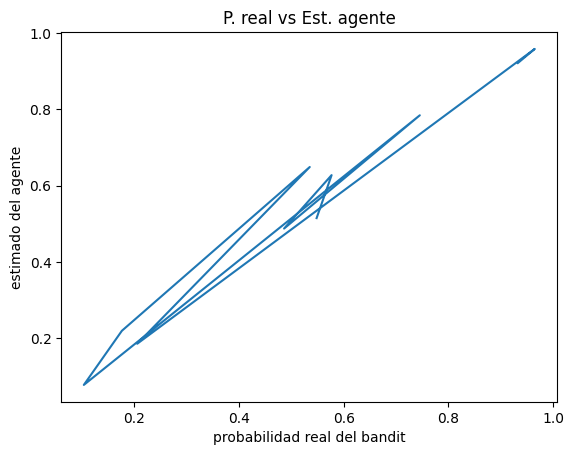

N of times k-arm was pulled
[66, 43, 41, 65, 64, 50, 57, 43, 265, 306]
rewards
[0.515151515151515, 0.627906976744186, 0.48780487804878037, 0.7846153846153846, 0.07812500000000001, 0.21999999999999997, 0.6491228070175439, 0.18604651162790703, 0.9584905660377354, 0.9215686274509802]
recompensa_acumulada
729


In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self):
        self.arm_prob = np.random.rand(10)

    def pull(self, arm):
        return 1 if np.random.rand() < self.arm_prob[arm] else 0


class Agent:
    def __init__(self, epsilon):
        self.epsilon = epsilon
        self.reward_estimates = [0] * 10
        self.pulled_arms = [0] * 10

    def select_arm(self):
        # Si el valor aleatorio es menor a epsilon se explorara (prob = ϵ)
        if np.random.rand() <= self.epsilon:
            return int(np.random.random_integers(0,9))
        # De lo contrario se eligirá el valor mas alto de la lista (prob = 1-ϵ)
        else:
            return int(self.reward_estimates.index(max(self.reward_estimates)))

    def update_estimates(self, arm, reward):
        # aumentar el conteo del brazo seleccionado
        self.pulled_arms[arm] += 1

        # reward en el tiempo t
        Q_t_a = self.reward_estimates[arm]
        # actualizar la estimación del brazo , tiempo t+1
        self.reward_estimates[arm] = self.reward_estimates[arm] + ((1/self.pulled_arms[arm]) * (reward - Q_t_a))


bandit = Bandit()
agente = Agent(epsilon=0.5)
recompensa_acumulada = 0
recompensas_acumuladas = []
for t in range(1000):
    brazo_select =  agente.select_arm()
    reward = bandit.pull(brazo_select)
    agente.update_estimates(brazo_select,reward)
    recompensa_acumulada += reward
    recompensas_acumuladas.append(recompensa_acumulada)

plt.figure()
plt.plot(recompensas_acumuladas)
plt.xlabel('Tiempo')
plt.ylabel('Recompensa Acumulada')
plt.title('Tiempo vs Recompensa Acumulada')
plt.show()

plt.figure()
plt.scatter(bandit.arm_prob,agente.reward_estimates)
plt.xlabel('probabilidad real del bandit')
plt.ylabel('estimado del agente')
plt.title('P. real vs Est. agente')
plt.show()

print('N of times k-arm was pulled')
print(agente.pulled_arms)
print('rewards')
print(agente.reward_estimates)
print('recompensa_acumulada')
print(recompensa_acumulada)


